In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import VarianceThreshold

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv("lending_club_loan_two.csv")
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\r\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113"
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,...,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\r\nDelacruzside, MA 00813"
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,...,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\r\nGreggshire, VA 11650"


# Feature Engineering

## Step 0 : Checking data types of columns and summary statistics

In [4]:
df.dtypes

loan_amnt               float64
term                     object
int_rate                float64
installment             float64
grade                    object
sub_grade                object
emp_title                object
emp_length               object
home_ownership           object
annual_inc              float64
verification_status      object
issue_d                  object
loan_status              object
purpose                  object
title                    object
dti                     float64
earliest_cr_line         object
open_acc                float64
pub_rec                 float64
revol_bal               float64
revol_util              float64
total_acc               float64
initial_list_status      object
application_type         object
mort_acc                float64
pub_rec_bankruptcies    float64
address                  object
dtype: object

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394275 non-null  object 
 15  

In [6]:
df.describe()

,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
count,396030.000000,396030.000000,396030.000000,3.960300e+05,396030.000000,396030.000000,396030.000000,3.960300e+05,395754.000000,396030.000000,358235.000000,395495.000000
mean,14113.888089,13.639400,431.849698,7.420318e+04,17.379514,11.311153,0.178191,1.584454e+04,53.791749,25.414744,1.813991,0.121648
std,8357.441341,4.472157,250.727790,6.163762e+04,18.019092,5.137649,0.530671,2.059184e+04,24.452193,11.886991,2.147930,0.356174
min,500.000000,5.320000,16.080000,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000,2.000000,0.000000,0.000000
25%,8000.000000,10.490000,250.330000,4.500000e+04,11.280000,8.000000,0.000000,6.025000e+03,35.800000,17.000000,0.000000,0.000000
50%,12000.000000,13.330000,375.430000,6.400000e+04,16.910000,10.000000,0.000000,1.118100e+04,54.800000,24.000000,1.000000,0.000000
75%,20000.000000,16.490000,567.300000,9.000000e+04,22.980000,14.000000,0.000000,1.962000e+04,72.900000,32.000000,3.000000,0.000000
max,40000.000000,30.990000,1533.810000,8.706582e+06,9999.000000,90.000000,86.000000,1.743266e+06,892.300000,151.000000,34.000000,8.000000


## Step 1 : Checking for duplicates

In [7]:
df.duplicated().sum() 

0

## Step 2 : Train Test Split
This step is done before any data preprocessing is done to avoid data leakage

In [8]:
## Checking proportion of label samples to decide splitting strategy
df['loan_status'].value_counts(normalize=True)

Fully Paid     0.803871
Charged Off    0.196129
Name: loan_status, dtype: float64

In [9]:
#Since there is an imbalance in the output labels we do stratified sampling
train_set, test_set = train_test_split(df, test_size=0.2, random_state=42, stratify = df['loan_status'])

In [10]:
train_set = train_set.reset_index(drop=True)
test_set = test_set.reset_index(drop=True)


## Step 3 : Missing Value Analysis

In [11]:
for col in train_set.columns:
    if round((train_set[col].isna().sum()*100)/len(train_set),2)>0:
        print(f"For column {col}")
        print(f"percentage of missing values: {round((train_set[col].isna().sum()*100)/len(train_set),2)}%")
        print(f"number of missing values: {train_set[col].isna().sum()}")
        print(f"col type is: {train_set[col].dtype}")
        print()

For column emp_title
percentage of missing values: 5.77%
number of missing values: 18286
col type is: object

For column emp_length
percentage of missing values: 4.59%
number of missing values: 14541
col type is: object

For column title
percentage of missing values: 0.44%
number of missing values: 1398
col type is: object

For column revol_util
percentage of missing values: 0.07%
number of missing values: 220
col type is: float64

For column mort_acc
percentage of missing values: 9.53%
number of missing values: 30207
col type is: float64

For column pub_rec_bankruptcies
percentage of missing values: 0.14%
number of missing values: 437
col type is: float64



### Deciding strategy for each column

### i. For coulmn pub_rec_bankruptcies

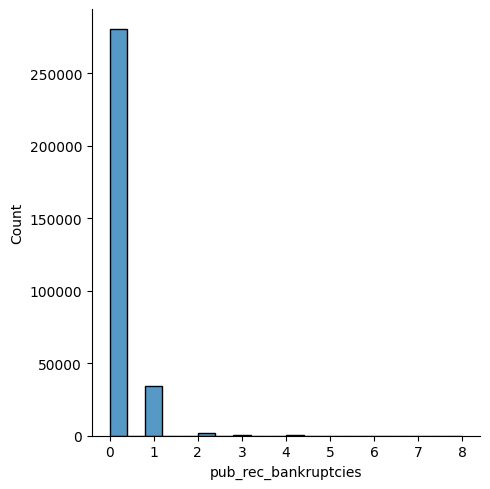

In [12]:
sns.displot(train_set["pub_rec_bankruptcies"])

In [13]:
train_set["pub_rec_bankruptcies"].value_counts()

0.0    280263
1.0     34254
2.0      1483
3.0       279
4.0        67
5.0        29
6.0         7
7.0         3
8.0         2
Name: pub_rec_bankruptcies, dtype: int64

We do mode imputation since it is essentially a categorical column with one category having an overwhelming proportion and thus, mode imputation wouldn't induce bias

In [14]:
train_set["pub_rec_bankruptcies"] = train_set["pub_rec_bankruptcies"].fillna(train_set["pub_rec_bankruptcies"].mode()[0])
test_set["pub_rec_bankruptcies"] = test_set["pub_rec_bankruptcies"].fillna(train_set["pub_rec_bankruptcies"].mode()[0])

### ii. For coulmn mort_acc

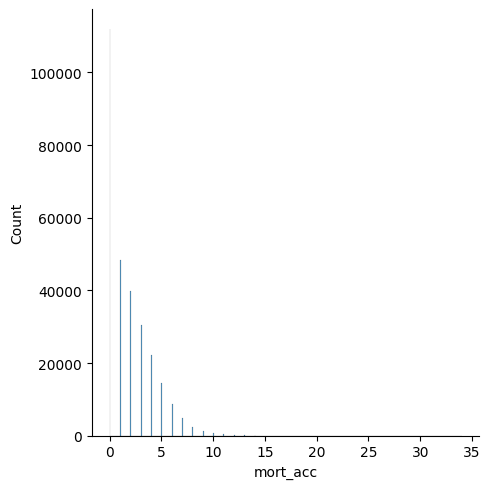

In [15]:
sns.displot(train_set["mort_acc"])

In [16]:
train_set["mort_acc"].value_counts()

0.0     111846
1.0      48331
2.0      39909
3.0      30541
4.0      22311
5.0      14525
6.0       8846
7.0       4858
8.0       2500
9.0       1317
10.0       679
11.0       380
12.0       214
13.0       116
14.0        86
15.0        45
16.0        28
17.0        16
18.0        13
20.0        12
19.0        12
24.0        10
25.0         4
22.0         3
21.0         3
31.0         2
27.0         2
32.0         2
26.0         2
30.0         1
34.0         1
28.0         1
23.0         1
Name: mort_acc, dtype: int64

We do median imputation since it is essentially a skewed numerical column 

In [17]:
train_set["mort_acc"] = train_set["mort_acc"].fillna(train_set["mort_acc"].median())
test_set["mort_acc"] = test_set["mort_acc"].fillna(train_set["mort_acc"].median())

### iii. For coulmn revol_util

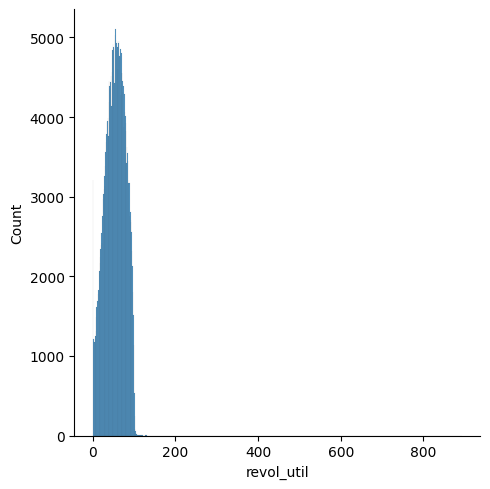

In [18]:
sns.displot(train_set["revol_util"])

We do median imputation since it is essentially a skewed numerical column 

In [19]:
train_set["revol_util"] = train_set["revol_util"].fillna(train_set["revol_util"].median())
test_set["revol_util"] = test_set["revol_util"].fillna(train_set["revol_util"].median())

### iv. For coulmn title

In [20]:
train_set["title"].value_counts()

Debt consolidation                       121886
Credit card refinancing                   41341
Home improvement                          12165
Other                                     10372
Debt Consolidation                         9244
                                          ...  
Debt Consolidation - Credit Card              1
Responsible Borrower refinancing debt         1
Get Finances in Order                         1
final credit card pay off                     1
Credit card pay off and shred them            1
Name: title, Length: 40305, dtype: int64

In [21]:
len(train_set["title"].unique())

40306

We drop missing value rows since the number of such rows is extrmely small (0.44%) and in addition no statistical imputation strategy would make sense for such an unevenly distributed non-numerical column

In [22]:
train_set.dropna(subset = ['title'], inplace=True)
test_set.dropna(subset = ['title'], inplace=True)

### v. For coulmn emp_length

In [23]:
train_set["emp_length"].value_counts()

10+ years    100519
2 years       28574
< 1 year      25341
3 years       25073
5 years       21185
1 year        20632
4 years       19070
6 years       16686
7 years       16550
8 years       15272
9 years       12158
Name: emp_length, dtype: int64

We do mode value imputation for this column

In [24]:
train_set["emp_length"] = train_set["emp_length"].fillna(train_set["emp_length"].mode()[0])
test_set["emp_length"] = test_set["emp_length"].fillna(train_set["emp_length"].mode()[0])

### vi. For coulmn emp_title

In [25]:
train_set["emp_title"].value_counts()

Teacher                        3543
Manager                        3409
RN                             1475
Registered Nurse               1473
Supervisor                     1462
                               ... 
Corporate Travel Consultant       1
Paula's Choice                    1
Madden's on Gull Lake             1
U S BORDER PATROL                 1
SymphonyIRI                       1
Name: emp_title, Length: 142905, dtype: int64

In [26]:
len(train_set["emp_title"].unique())

142906

We drop this column since over half the rows have unique values and thus, there will no contribution in the explainability of trend by this feature.

In [27]:
train_set.drop(['emp_title'],axis=1,inplace=True)
test_set.drop(['emp_title'],axis=1,inplace=True)

## Step 4 : Dealing with temporal variables

We have two temporal features to deal with - issue_d and earliest_cr_line

We create a new feature by computing (issue_d - earliest_cr_line) since issue_d contains the date on which the loan was issued and earliest_cr_line gives an idea of when the customer were given their first line of credit by the bank. Thus, their difference would would speak to the customer's length of association with the bank and in turn, their loyalty and trustworthiness.

In [28]:
train_set['customer_loyalty_period'] = (pd.to_datetime(train_set['issue_d']) - pd.to_datetime(train_set['earliest_cr_line']))/timedelta(days=365)
test_set['customer_loyalty_period'] = (pd.to_datetime(test_set['issue_d']) - pd.to_datetime(test_set['earliest_cr_line']))/timedelta(days=365)

In [29]:
train_set.drop(["issue_d"], axis=1, inplace=True)
test_set.drop(["issue_d"], axis=1, inplace=True)
train_set.drop(['earliest_cr_line'], axis=1, inplace=True)
test_set.drop(['earliest_cr_line'], axis=1, inplace=True)

## Step 5 : Outlier Analysis

In [30]:
train_set.dtypes

loan_amnt                  float64
term                        object
int_rate                   float64
installment                float64
grade                       object
sub_grade                   object
emp_length                  object
home_ownership              object
annual_inc                 float64
verification_status         object
loan_status                 object
purpose                     object
title                       object
dti                        float64
open_acc                   float64
pub_rec                    float64
revol_bal                  float64
revol_util                 float64
total_acc                  float64
initial_list_status         object
application_type            object
mort_acc                   float64
pub_rec_bankruptcies       float64
address                     object
customer_loyalty_period    float64
dtype: object

Outlier Analysis will be done on numerical columns

In [31]:
# Weeding out numerical columns that can be considered as categorical columns i.e. <=10 unique values
for col in train_set.columns:
    if train_set[col].dtype in ['int64','float64']:
        if len(train_set[col].unique())<=10:
            print(col)

pub_rec_bankruptcies


Thus, our outlier analysis will be on all numerical columns except public_rec_bankruptcies

In [32]:
def numerical_feat(df,colname,nrows=2,mcols=2,width=20,height=60):
    fig , ax = plt.subplots(nrows,mcols,figsize=(width,height))
    fig.set_facecolor("peachpuff")
    rows = 0
    for var in colname:        
        
        plt.ylabel(var, fontsize=12)
        sns.boxplot(y = df[var],color='crimson',ax=ax[rows][0])
        sns.distplot(df[var],color='purple',ax=ax[rows][1])
        ax[rows][1].axvline(df[var].mean(), color='r', linestyle='--', label="Mean")
        ax[rows][1].axvline(df[var].median(), color='m', linestyle='-', label="Median")
        ax[rows][1].axvline(df[var].mode()[0], color='royalblue', linestyle='-', label="Mode")
        
        ax[rows][1].legend({'Mean':df[var].mean(),'Median':df[var].median(),'Mode':df[var].mode()})
        rows += 1
    plt.show()

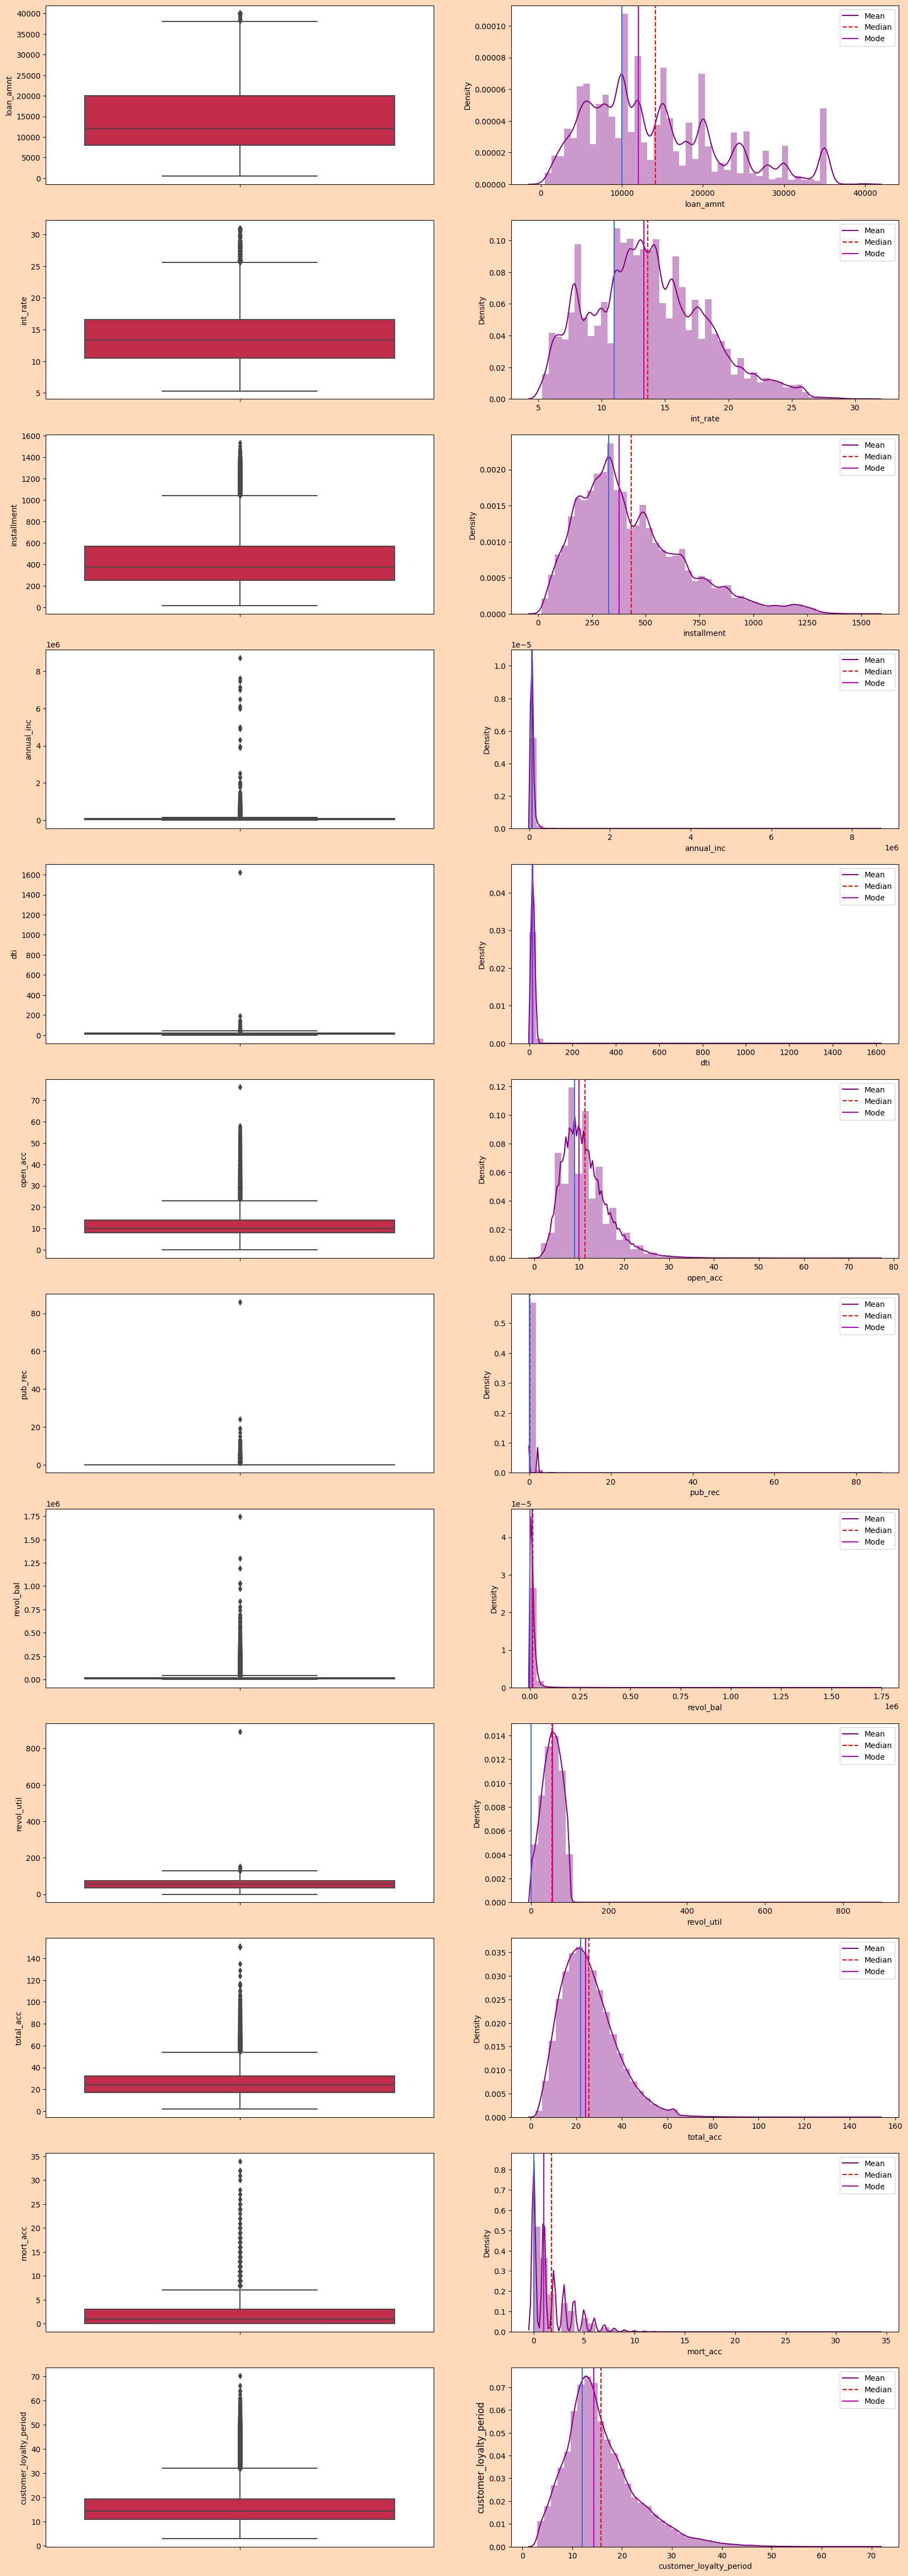

In [33]:
numerical_cols = [col for col in train_set.columns if train_set[col].dtype in ['int64','float64'] and col!='pub_rec_bankruptcies']
numerical_feat(train_set,numerical_cols,len(numerical_cols))

We can see a significant number of outliers in all variables and hence, we do IQR based Outlier removal.

In [34]:
def IQR_based_outlier_removal(df_train, df_test, numerical_cols):
    q1 = df_train[numerical_cols].quantile(0.25)
    q3 = df_train[numerical_cols].quantile(0.75)
    iqr = q3 -q1
    initial_vals_train = len(df_train)
    initial_vals_test = len(df_test)
    df_train = df_train[~((df_train[numerical_cols]<q1-3*iqr) | (df_train[numerical_cols]>q3+3*iqr)).any(axis = 1)]
    df_test = df_test[~((df_test[numerical_cols]<q1-3*iqr) | (df_test[numerical_cols]>q3+3*iqr)).any(axis = 1)]
    df_train = df_train.reset_index(drop = True)
    df_test = df_test.reset_index(drop = True)
    processed_vals_train = len(df_train)
    processed_vals_test = len(df_test)
    print("Percentage of rows dropped from training data:",((initial_vals_train-processed_vals_train)*100)/initial_vals_train)
    print("Percentage of rows dropped from test data:",((initial_vals_test-processed_vals_test)*100)/initial_vals_test)
    return df_train, df_test

In [35]:
train_set, test_set = IQR_based_outlier_removal(train_set, test_set, numerical_cols)

Percentage of rows dropped from training data: 17.932890757261607
Percentage of rows dropped from test data: 17.84042917475174


In [36]:
y_train = train_set['loan_status']
y_test = test_set['loan_status']
x_train = train_set[[col for col in train_set if col!='loan_status']]
x_test = test_set[[col for col in train_set if col!='loan_status']]

## Step 6 : Encoding Categorical Variables

In [37]:
cat_columns = [col for col in x_train.columns if x_train[col].dtype=='object'] + ['pub_rec_bankruptcies']

In [38]:
x_train[cat_columns]

,term,grade,sub_grade,emp_length,home_ownership,verification_status,purpose,title,initial_list_status,application_type,address,pub_rec_bankruptcies
0,60 months,B,B2,10+ years,OWN,Verified,debt_consolidation,Debt Consolidation,f,INDIVIDUAL,"7530 Barnes Flat Apt. 584\r\nWhitetown, NV 30723",0.0
1,60 months,D,D5,10+ years,MORTGAGE,Verified,credit_card,Credit card refinancing,w,INDIVIDUAL,3857 Christopher Courts Suite 005\r\nEast Chri...,0.0
2,36 months,B,B3,10+ years,RENT,Verified,debt_consolidation,cardcars,f,INDIVIDUAL,"840 Parks Viaduct\r\nLake Brittanyside, MT 48052",0.0
3,60 months,D,D4,10+ years,RENT,Verified,debt_consolidation,Debt consolidation,w,INDIVIDUAL,"042 Jamie Grove\r\nEast Maryshire, LA 70466",0.0
4,36 months,A,A1,8 years,OWN,Not Verified,home_improvement,Home improvement,w,INDIVIDUAL,"8327 Lambert Spring Suite 883\r\nMurphyfort, N...",0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
258856,60 months,B,B5,10+ years,MORTGAGE,Not Verified,other,Other,w,INDIVIDUAL,"2723 Hanna Walks\r\nEast Scott, DC 29597",0.0
258857,36 months,A,A5,1 year,RENT,Verified,credit_card,Debt Consolidation Loan,w,INDIVIDUAL,"7245 Smith Heights\r\nSouth Johnfurt, MN 48052",0.0
258858,36 months,A,A5,8 years,MORTGAGE,Not Verified,debt_consolidation,Debt consolidation,w,INDIVIDUAL,"614 Brown Lake\r\nKristabury, PA 48052",0.0
258859,36 months,C,C3,8 years,MORTGAGE,Verified,debt_consolidation,Debt consolidation,w,INDIVIDUAL,87725 Benjamin Parkways Suite 228\r\nNew Judit...,0.0


In [39]:
# We drop the address column as we can't extract any relevant feature from them - they are unique for each customer
x_train.drop(['address'], axis=1, inplace=True)
x_test.drop(['address'], axis=1, inplace=True)

In [40]:
# We drop the grade column as it gives the same explanatory contribution as the sub-grade column
x_train.drop(['grade'], axis=1, inplace=True)
x_test.drop(['grade'], axis=1, inplace=True)

#### We can classify the categorical variables as ordinal or nominal:
- Ordinal : term, sub-grade, emp_length
- Nominal : home_ownership, verification_status, purpose, title, application_type, initial_list_status

### Dealing with ordinal columns

In [41]:
for col in ['term', 'sub_grade', 'emp_length']:
    print(f"Numer of unique categories for {col} is {len(x_train[col].unique())}")

Numer of unique categories for term is 2
Numer of unique categories for sub_grade is 35
Numer of unique categories for emp_length is 11


In [42]:
categorical_features = ['term', 'sub_grade', 'emp_length']  # list of all categorical features to be encoded
feature_label_mapping = {}  # dictionary which holds the rank mapping for each categorical variable i.e. our transformer which will be used to transform/encode our test/future data in the form {Name:{a1:4,a3:3...ax:0},Pet:{Dog:3,..xyz:0}} 

In [43]:
x_train['term'].unique()

array([' 60 months', ' 36 months'], dtype=object)

In [44]:
feature_label_mapping['term'] = {' 36 months':0, ' 60 months':1}

In [45]:
x_train['sub_grade'].unique()

array(['B2', 'D5', 'B3', 'D4', 'A1', 'E1', 'B1', 'B5', 'B4', 'C2', 'A4',
       'F4', 'A5', 'A3', 'D3', 'C3', 'D2', 'C1', 'C5', 'E2', 'F2', 'C4',
       'A2', 'E4', 'D1', 'F3', 'E3', 'F1', 'G1', 'E5', 'G4', 'G2', 'G3',
       'F5', 'G5'], dtype=object)

In [46]:
feature_label_mapping['sub_grade'] = {}
c = 0 
for letter in ['A','B','C','D','E','F','G']:
    for number in [1,2,3,4,5]:
        feature_label_mapping['sub_grade'][letter+str(number)] = c
        c+=1

In [47]:
x_train['emp_length'].unique()

array(['10+ years', '8 years', '1 year', '3 years', '< 1 year', '6 years',
       '9 years', '7 years', '4 years', '5 years', '2 years'],
      dtype=object)

In [48]:
feature_label_mapping['emp_length'] = {'< 1 year':0, '1 year':1, '2 years':2, '3 years':3, '4 years':4, '5 years':5, '6 years':6,
                                '7 years':7, '8 years':8, '9 years':9, '10+ years':10}

In [49]:
x_train_copy = x_train.copy() #we need a pre-encoded version of the train dataframe as needed during the encoding of test data.
for feature in categorical_features:
    x_train[feature]=x_train[feature].map(feature_label_mapping[feature]) #implement the ranking mapping on the feature


# add a "New":-1 entry to each feature's ranking mapping dictionary to account for any new category that may appear in the test/any future data
for var in feature_label_mapping.keys():
    feature_label_mapping[var]['New'] = -1

In [50]:
# function that should be called to implement the encoding on any future data/test set,etc:
def target_ordinal_encoding(d2):  #feature_label_mapping variable should be accessable to this function as it is the transformer to be used.
    categorical_features = ['term', 'sub_grade', 'emp_length']
    
    for feature in categorical_features:
        d2[feature] = np.where(d2[feature].isin(list(x_train_copy[feature].unique())),d2[feature],'New') # we need the pre-encoded values from d1(train) dataframe so createa  copy of the train dataframe before doing it's encoding. This line will mark any new categories in the d2(test/future data) dataframe as "New"
        d2[feature]=d2[feature].map(feature_label_mapping[feature])  # now that we have converted any new feature not present in the train data to "New" we can use our train data's ranking mapping dictionary on our test data
    return d2  #returns the encoded test/future dataframe based on mappings computed from the train data as we require

In [51]:
x_test = target_ordinal_encoding(x_test)

In [52]:
x_train

,loan_amnt,term,int_rate,installment,sub_grade,emp_length,home_ownership,annual_inc,verification_status,purpose,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,customer_loyalty_period
0,18500.0,1,10.65,340.24,6,10,OWN,40000.0,Verified,debt_consolidation,...,8.0,0.0,8.0,0.1,27.0,f,INDIVIDUAL,1.0,0.0,15.509589
1,35000.0,1,17.86,886.11,19,10,MORTGAGE,80000.0,Verified,credit_card,...,12.0,0.0,20239.0,57.5,36.0,w,INDIVIDUAL,2.0,0.0,17.010959
2,20400.0,0,12.12,678.75,7,10,RENT,65000.0,Verified,debt_consolidation,...,18.0,0.0,12717.0,49.4,31.0,f,INDIVIDUAL,0.0,0.0,14.506849
3,35000.0,1,17.57,880.61,18,10,RENT,200000.0,Verified,debt_consolidation,...,5.0,0.0,14572.0,63.1,8.0,w,INDIVIDUAL,0.0,0.0,6.164384
4,14000.0,0,5.32,421.61,0,8,OWN,65000.0,Not Verified,home_improvement,...,10.0,0.0,1043.0,3.7,27.0,w,INDIVIDUAL,2.0,0.0,11.090411
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
258856,16800.0,1,11.47,369.23,9,10,MORTGAGE,142000.0,Not Verified,other,...,20.0,0.0,6930.0,9.9,38.0,w,INDIVIDUAL,5.0,0.0,22.512329
258857,33600.0,0,8.90,1066.91,4,1,RENT,80000.0,Verified,credit_card,...,17.0,0.0,20437.0,46.7,33.0,w,INDIVIDUAL,0.0,0.0,10.093151
258858,9000.0,0,7.89,281.58,4,8,MORTGAGE,60000.0,Not Verified,debt_consolidation,...,8.0,0.0,8501.0,17.9,12.0,w,INDIVIDUAL,1.0,0.0,29.520548
258859,6450.0,0,13.33,218.36,12,8,MORTGAGE,108000.0,Verified,debt_consolidation,...,16.0,0.0,26914.0,78.7,42.0,w,INDIVIDUAL,8.0,0.0,33.021918


In [53]:
x_test

,loan_amnt,term,int_rate,installment,sub_grade,emp_length,home_ownership,annual_inc,verification_status,purpose,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,customer_loyalty_period
0,25000.0,0,14.61,861.88,15,9,RENT,71000.0,Not Verified,debt_consolidation,...,15.0,0.0,32484.0,52.7,63.0,f,INDIVIDUAL,1.0,0.0,11.342466
1,8900.0,0,18.99,326.20,20,10,MORTGAGE,36852.0,Verified,debt_consolidation,...,8.0,0.0,20001.0,93.9,22.0,w,INDIVIDUAL,3.0,0.0,43.115068
2,5875.0,0,15.88,206.20,13,1,RENT,20000.0,Not Verified,debt_consolidation,...,7.0,0.0,8625.0,63.4,8.0,f,INDIVIDUAL,0.0,0.0,5.920548
3,14400.0,0,17.57,517.50,16,10,RENT,87000.0,Source Verified,debt_consolidation,...,8.0,0.0,30290.0,90.7,20.0,w,INDIVIDUAL,2.0,0.0,15.178082
4,28200.0,0,14.09,965.05,9,5,MORTGAGE,100000.0,Verified,debt_consolidation,...,13.0,0.0,24652.0,67.4,38.0,f,INDIVIDUAL,4.0,0.0,11.679452
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64777,7000.0,0,19.22,257.38,18,1,RENT,33700.0,Not Verified,credit_card,...,14.0,0.0,8557.0,45.0,15.0,w,INDIVIDUAL,0.0,0.0,3.841096
64778,6000.0,0,12.29,200.12,10,10,OWN,73000.0,Source Verified,debt_consolidation,...,24.0,0.0,15694.0,66.5,44.0,f,INDIVIDUAL,1.0,0.0,17.509589
64779,7350.0,0,22.99,284.48,26,10,RENT,23000.0,Verified,other,...,15.0,0.0,9217.0,41.3,25.0,f,INDIVIDUAL,2.0,0.0,17.758904
64780,21000.0,1,8.90,434.91,4,10,MORTGAGE,90000.0,Verified,debt_consolidation,...,12.0,0.0,16228.0,22.7,33.0,f,INDIVIDUAL,3.0,0.0,18.257534


### Dealing with nominal columns

In [54]:
nominal_columns = ['home_ownership', 'verification_status', 'purpose', 'title', 'application_type', 'initial_list_status']

In [55]:
x_train['home_ownership'].value_counts()

MORTGAGE    127477
RENT        107020
OWN          24256
OTHER           86
NONE            20
ANY              2
Name: home_ownership, dtype: int64

In [56]:
x_train['verification_status'].value_counts()

Verified           89301
Not Verified       86556
Source Verified    83004
Name: verification_status, dtype: int64

In [57]:
x_train['purpose'].value_counts()

debt_consolidation    153418
credit_card            54873
home_improvement       14472
other                  13836
major_purchase          5928
small_business          3654
car                     3177
medical                 2701
moving                  1971
vacation                1615
house                   1445
wedding                 1354
renewable_energy         222
educational              195
Name: purpose, dtype: int64

In [58]:
len(x_train['title'].unique())

36483

In [59]:
x_train['application_type'].value_counts()

INDIVIDUAL    258498
JOINT            203
DIRECT_PAY       160
Name: application_type, dtype: int64

In [60]:
x_train['initial_list_status'].value_counts()

f    159688
w     99173
Name: initial_list_status, dtype: int64

#### We drop title column as it is giving same info as column purpose

In [61]:
x_train.drop(['title'], axis=1, inplace=True)
x_test.drop(['title'], axis=1, inplace=True)

#### Since each nominal feature has a small number of categories, we can directly use one hot encoding

In [62]:
cat_features = ['home_ownership', 'verification_status', 'purpose', 'application_type', 'initial_list_status']   # list of all nominal columns to be encoded.
encoder = OneHotEncoder(handle_unknown="ignore") #handle_unknow=ignore means that if a new category encountered during transform(testing) then it is encoded as all 0s
x_train_ohe = encoder.fit_transform(x_train[cat_features]) 
col_names = []  # col_names holds the names of all newly created encoded columns
[col_names.extend(l1) for l1 in [list(arr) for arr in encoder.categories_]]
cat_encoded = pd.DataFrame(x_train_ohe.toarray(),columns = col_names)   #dataframe containing the encoded categorical variables
x_train = pd.concat((x_train.loc[:,~x_train.columns.isin(cat_features)].reset_index(drop=True), cat_encoded), axis=1)  #final dataframe by joining all variables excluding the ones in cat_features with the one-hot encoded dataframe

In [63]:
# the below function is to be called when using test data for validation or any new world example
def one_hot_encoder(d2):
    cat_features = ['home_ownership', 'verification_status', 'purpose', 'application_type', 'initial_list_status']
    d2_ohe = encoder.transform(d2[cat_features])
    col_names = []
    [col_names.extend(l1) for l1 in [list(arr) for arr in encoder.categories_]]
    cat_encoded = pd.DataFrame(d2_ohe.toarray(),columns = col_names)
    d2_encoded = pd.concat((d2.loc[:,~d2.columns.isin(cat_features)].reset_index(drop=True), cat_encoded), axis=1)
    return d2_encoded

In [64]:
x_test = one_hot_encoder(x_test)

In [65]:
x_train

,loan_amnt,term,int_rate,installment,sub_grade,emp_length,annual_inc,dti,open_acc,pub_rec,...,other,renewable_energy,small_business,vacation,wedding,DIRECT_PAY,INDIVIDUAL,JOINT,f,w
0,18500.0,1,10.65,340.24,6,10,40000.0,26.34,8.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,35000.0,1,17.86,886.11,19,10,80000.0,34.38,12.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
2,20400.0,0,12.12,678.75,7,10,65000.0,21.30,18.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
3,35000.0,1,17.57,880.61,18,10,200000.0,5.08,5.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
4,14000.0,0,5.32,421.61,0,8,65000.0,10.97,10.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
258856,16800.0,1,11.47,369.23,9,10,142000.0,6.14,20.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
258857,33600.0,0,8.90,1066.91,4,1,80000.0,22.22,17.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
258858,9000.0,0,7.89,281.58,4,8,60000.0,3.85,8.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
258859,6450.0,0,13.33,218.36,12,8,108000.0,21.14,16.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


In [66]:
x_test

,loan_amnt,term,int_rate,installment,sub_grade,emp_length,annual_inc,dti,open_acc,pub_rec,...,other,renewable_energy,small_business,vacation,wedding,DIRECT_PAY,INDIVIDUAL,JOINT,f,w
0,25000.0,0,14.61,861.88,15,9,71000.0,22.62,15.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,8900.0,0,18.99,326.20,20,10,36852.0,29.01,8.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
2,5875.0,0,15.88,206.20,13,1,20000.0,16.32,7.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
3,14400.0,0,17.57,517.50,16,10,87000.0,16.44,8.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
4,28200.0,0,14.09,965.05,9,5,100000.0,19.26,13.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64777,7000.0,0,19.22,257.38,18,1,33700.0,26.75,14.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
64778,6000.0,0,12.29,200.12,10,10,73000.0,27.53,24.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
64779,7350.0,0,22.99,284.48,26,10,23000.0,35.80,15.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
64780,21000.0,1,8.90,434.91,4,10,90000.0,10.88,12.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


## Step 7 : Data Standardization

In [67]:
scaler = StandardScaler()
train_scaled = scaler.fit_transform(x_train)
test_scaled = scaler.transform(x_test)
x_train = pd.DataFrame(train_scaled, columns = x_train.columns)
x_test = pd.DataFrame(test_scaled, columns = x_test.columns)

In [68]:
x_train

,loan_amnt,term,int_rate,installment,sub_grade,emp_length,annual_inc,dti,open_acc,pub_rec,...,other,renewable_energy,small_business,vacation,wedding,DIRECT_PAY,INDIVIDUAL,JOINT,f,w
0,0.522096,1.786792,-0.641636,-0.372935,-0.736765,1.089233,-0.866029,1.099467,-0.646361,0.0,...,-0.237629,-0.029297,-0.119657,-0.079234,-0.072513,-0.024869,0.037474,-0.028015,0.788062,-0.788062
1,2.511850,1.786792,0.960309,1.828646,1.221088,1.089233,0.280387,2.096351,0.165668,0.0,...,-0.237629,-0.029297,-0.119657,-0.079234,-0.072513,-0.024869,0.037474,-0.028015,-1.268935,1.268935
2,0.751219,-0.559662,-0.315026,0.992330,-0.586161,1.089233,-0.149519,0.474555,1.383713,0.0,...,-0.237629,-0.029297,-0.119657,-0.079234,-0.072513,-0.024869,0.037474,-0.028015,0.788062,-0.788062
3,2.511850,1.786792,0.895876,1.806463,1.070484,1.089233,3.719637,-1.536571,-1.255383,0.0,...,-0.237629,-0.029297,-0.119657,-0.079234,-0.072513,-0.024869,0.037474,-0.028015,-1.268935,1.268935
4,-0.020564,-0.559662,-1.825876,-0.044757,-1.640389,0.544137,-0.149519,-0.806267,-0.240346,0.0,...,-0.237629,-0.029297,-0.119657,-0.079234,-0.072513,-0.024869,0.037474,-0.028015,-1.268935,1.268935
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
258856,0.317091,1.786792,-0.459445,-0.256014,-0.284953,1.089233,2.057333,-1.405141,1.789728,0.0,...,4.208234,-0.029297,-0.119657,-0.079234,-0.072513,-0.024869,0.037474,-0.028015,-1.268935,1.268935
258857,2.343022,-0.559662,-1.030458,2.557841,-1.037973,-1.363700,0.280387,0.588626,1.180705,0.0,...,-0.237629,-0.029297,-0.119657,-0.079234,-0.072513,-0.024869,0.037474,-0.028015,-1.268935,1.268935
258858,-0.623520,-0.559662,-1.254863,-0.609520,-1.037973,0.544137,-0.292821,-1.689080,-0.646361,0.0,...,-0.237629,-0.029297,-0.119657,-0.079234,-0.072513,-0.024869,0.037474,-0.028015,-1.268935,1.268935
258859,-0.931028,-0.559662,-0.046183,-0.864497,0.166859,0.544137,1.082879,0.454717,0.977698,0.0,...,-0.237629,-0.029297,-0.119657,-0.079234,-0.072513,-0.024869,0.037474,-0.028015,-1.268935,1.268935


In [69]:
x_test

,loan_amnt,term,int_rate,installment,sub_grade,emp_length,annual_inc,dti,open_acc,pub_rec,...,other,renewable_energy,small_business,vacation,wedding,DIRECT_PAY,INDIVIDUAL,JOINT,f,w
0,1.305938,-0.559662,0.238212,1.730922,0.618672,0.816685,0.022443,0.638223,0.774691,0.0,...,-0.237629,-0.029297,-0.119657,-0.079234,-0.072513,-0.024869,0.037474,-0.028015,0.788062,-0.788062
1,-0.635579,-0.559662,1.211377,-0.429561,1.371692,1.089233,-0.956252,1.430522,-0.646361,0.0,...,-0.237629,-0.029297,-0.119657,-0.079234,-0.072513,-0.024869,0.037474,-0.028015,-1.268935,1.268935
2,-1.000367,-0.559662,0.520385,-0.913540,0.317463,-1.363700,-1.439238,-0.142918,-0.849368,0.0,...,-0.237629,-0.029297,-0.119657,-0.079234,-0.072513,-0.024869,0.037474,-0.028015,0.788062,-0.788062
3,0.027672,-0.559662,0.895876,0.341983,0.769276,1.089233,0.481010,-0.128039,-0.646361,0.0,...,-0.237629,-0.029297,-0.119657,-0.079234,-0.072513,-0.024869,0.037474,-0.028015,-1.268935,1.268935
4,1.691830,-0.559662,0.122676,2.147023,-0.284953,-0.273507,0.853596,0.221614,0.368676,0.0,...,-0.237629,-0.029297,-0.119657,-0.079234,-0.072513,-0.024869,0.037474,-0.028015,0.788062,-0.788062
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64777,-0.864702,-0.559662,1.262479,-0.707123,1.070484,-1.363700,-1.046590,1.150304,0.571683,0.0,...,-0.237629,-0.029297,-0.119657,-0.079234,-0.072513,-0.024869,0.037474,-0.028015,-1.268935,1.268935
64778,-0.985294,-0.559662,-0.277255,-0.938062,-0.134349,1.089233,0.079764,1.247016,2.601757,0.0,...,-0.237629,-0.029297,-0.119657,-0.079234,-0.072513,-0.024869,0.037474,-0.028015,0.788062,-0.788062
64779,-0.822495,-0.559662,2.100112,-0.597824,2.275316,1.089233,-1.353257,2.272418,0.774691,0.0,...,4.208234,-0.029297,-0.119657,-0.079234,-0.072513,-0.024869,0.037474,-0.028015,0.788062,-0.788062
64780,0.823574,1.786792,-1.030458,0.008884,-1.037973,1.089233,0.566991,-0.817426,0.165668,0.0,...,-0.237629,-0.029297,-0.119657,-0.079234,-0.072513,-0.024869,0.037474,-0.028015,0.788062,-0.788062


# Feature Selection

## 1. Checking for low variance features

In [70]:
var_thresh = VarianceThreshold(threshold=0.2)   # dropping constant features for now but can increase this threshold to 0.1,0.2,0.3,... based on use case
var_thresh.fit(x_train)
constant_cols = [col for col in x_train.columns if col not in x_train.columns[var_thresh.get_support()]]  #will get list of columns to drop

In [71]:
constant_cols

['pub_rec', 'pub_rec_bankruptcies']

We drop the numerical features 'pub_rec' and 'pub_rec_bankruptcies' since they have extremely low variance and will not contribute to the overall trend explainability. This can also be reaffirmed from the actual definition of the features - they represent Number of derogatory public records which is 0 for nearly 90% of the customers and thus, is not a strong indicator of whether the customer can default or not.

In [72]:
x_train.drop(['pub_rec', 'pub_rec_bankruptcies'], axis=1, inplace=True)
x_test.drop(['pub_rec', 'pub_rec_bankruptcies'], axis=1, inplace=True)

## 2. Checking correlation between features

In [73]:
def multicolin(X, threshold):   # X is the entire train dataset without the output/dependant variable column. Threshold is set as per domain expertise or based on observation.
    col_corr = []
    corr_matrix = X.corr() 
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j]) >= threshold and ((corr_matrix.columns[i],corr_matrix.columns[j]) not in col_corr) and ((corr_matrix.columns[j],corr_matrix.columns[i]) not in col_corr) and (corr_matrix.columns[i]!=corr_matrix.columns[j]):
                colname1 = corr_matrix.columns[i]
                colname2 = corr_matrix.columns[j]
                col_corr.append((colname1,colname2))

    return col_corr    #will return list of all input feature columns which are highly correlated to each other

In [74]:
# Setting correlation threshold to 0.8
multicolin(x_train, 0.8)

[('installment', 'loan_amnt'),
 ('sub_grade', 'int_rate'),
 ('RENT', 'MORTGAGE'),
 ('w', 'f')]

#### Dropping features with >=0.8 correlation score

In [75]:
cols_to_drop = []
multicolin_cols = multicolin(x_train, 0.8)
for col1, col2 in multicolin_cols:
    if col1 not in [col2 for col1,col2 in multicolin_cols]:  # this condition added to ensure that a column that maybe present as col1 in tuple x may also be in another pair as col2 in tuple y which may result in complete elimination of tuple y as we eliminate it's col1 regardless and its col2 got removed as part of colx so better to retain a few multicolinear features rather than indadvertantly loosing out on a potentially imp feature
        cols_to_drop.append(col1)

cols_to_drop = list(set(cols_to_drop))
x_train.drop(cols_to_drop, axis=1, inplace=True)
x_test.drop(cols_to_drop, axis=1, inplace=True)

In [76]:
x_train

,loan_amnt,term,int_rate,emp_length,annual_inc,dti,open_acc,revol_bal,revol_util,total_acc,...,moving,other,renewable_energy,small_business,vacation,wedding,DIRECT_PAY,INDIVIDUAL,JOINT,f
0,0.522096,1.786792,-0.641636,1.089233,-0.866029,1.099467,-0.646361,-1.318549,-2.218987,0.186392,...,-0.087593,-0.237629,-0.029297,-0.119657,-0.079234,-0.072513,-0.024869,0.037474,-0.028015,0.788062
1,2.511850,1.786792,0.960309,1.089233,0.280387,2.096351,0.165668,0.508110,0.117709,0.968844,...,-0.087593,-0.237629,-0.029297,-0.119657,-0.079234,-0.072513,-0.024869,0.037474,-0.028015,-1.268935
2,0.751219,-0.559662,-0.315026,1.089233,-0.149519,0.474555,1.383713,-0.171052,-0.212034,0.534148,...,-0.087593,-0.237629,-0.029297,-0.119657,-0.079234,-0.072513,-0.024869,0.037474,-0.028015,0.788062
3,2.511850,1.786792,0.895876,1.089233,3.719637,-1.536571,-1.255383,-0.003564,0.345679,-1.465452,...,-0.087593,-0.237629,-0.029297,-0.119657,-0.079234,-0.072513,-0.024869,0.037474,-0.028015,-1.268935
4,-0.020564,-0.559662,-1.825876,0.544137,-0.149519,-0.806267,-0.240346,-1.225098,-2.072434,0.186392,...,-0.087593,-0.237629,-0.029297,-0.119657,-0.079234,-0.072513,-0.024869,0.037474,-0.028015,-1.268935
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
258856,0.317091,1.786792,-0.459445,1.089233,2.057333,-1.405141,1.789728,-0.693561,-1.820039,1.142722,...,-0.087593,4.208234,-0.029297,-0.119657,-0.079234,-0.072513,-0.024869,0.037474,-0.028015,-1.268935
258857,2.343022,-0.559662,-1.030458,-1.363700,0.280387,0.588626,1.180705,0.525987,-0.321948,0.708027,...,-0.087593,-0.237629,-0.029297,-0.119657,-0.079234,-0.072513,-0.024869,0.037474,-0.028015,-1.268935
258858,-0.623520,-0.559662,-1.254863,0.544137,-0.292821,-1.689080,-0.646361,-0.551715,-1.494367,-1.117695,...,-0.087593,-0.237629,-0.029297,-0.119657,-0.079234,-0.072513,-0.024869,0.037474,-0.028015,-1.268935
258859,-0.931028,-0.559662,-0.046183,0.544137,1.082879,0.454717,0.977698,1.110796,0.980739,1.490479,...,-0.087593,-0.237629,-0.029297,-0.119657,-0.079234,-0.072513,-0.024869,0.037474,-0.028015,-1.268935


In [77]:
x_test

,loan_amnt,term,int_rate,emp_length,annual_inc,dti,open_acc,revol_bal,revol_util,total_acc,...,moving,other,renewable_energy,small_business,vacation,wedding,DIRECT_PAY,INDIVIDUAL,JOINT,f
0,1.305938,-0.559662,0.238212,0.816685,0.022443,0.638223,0.774691,1.613712,-0.077695,3.316201,...,-0.087593,-0.237629,-0.029297,-0.119657,-0.079234,-0.072513,-0.024869,0.037474,-0.028015,0.788062
1,-0.635579,-0.559662,1.211377,1.089233,-0.956252,1.430522,-0.646361,0.486621,1.599515,-0.248304,...,-0.087593,-0.237629,-0.029297,-0.119657,-0.079234,-0.072513,-0.024869,0.037474,-0.028015,-1.268935
2,-1.000367,-0.559662,0.520385,-1.363700,-1.439238,-0.142918,-0.849368,-0.540519,0.357892,-1.465452,...,-0.087593,-0.237629,-0.029297,-0.119657,-0.079234,-0.072513,-0.024869,0.037474,-0.028015,0.788062
3,0.027672,-0.559662,0.895876,1.089233,0.481010,-0.128039,-0.646361,1.415616,1.469247,-0.422182,...,-0.087593,-0.237629,-0.029297,-0.119657,-0.079234,-0.072513,-0.024869,0.037474,-0.028015,-1.268935
4,1.691830,-0.559662,0.122676,-0.273507,0.853596,0.221614,0.368676,0.906560,0.520727,1.142722,...,-0.087593,-0.237629,-0.029297,-0.119657,-0.079234,-0.072513,-0.024869,0.037474,-0.028015,0.788062
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64777,-0.864702,-0.559662,1.262479,-1.363700,-1.046590,1.150304,0.571683,-0.546659,-0.391154,-0.856878,...,-0.087593,-0.237629,-0.029297,-0.119657,-0.079234,-0.072513,-0.024869,0.037474,-0.028015,-1.268935
64778,-0.985294,-0.559662,-0.277255,1.089233,0.079764,1.247016,2.601757,0.097742,0.484089,1.664357,...,-0.087593,-0.237629,-0.029297,-0.119657,-0.079234,-0.072513,-0.024869,0.037474,-0.028015,0.788062
64779,-0.822495,-0.559662,2.100112,1.089233,-1.353257,2.272418,0.774691,-0.487067,-0.541777,0.012514,...,-0.087593,4.208234,-0.029297,-0.119657,-0.079234,-0.072513,-0.024869,0.037474,-0.028015,0.788062
64780,0.823574,1.786792,-1.030458,1.089233,0.566991,-0.817426,0.165668,0.145956,-1.298964,0.708027,...,-0.087593,-0.237629,-0.029297,-0.119657,-0.079234,-0.072513,-0.024869,0.037474,-0.028015,0.788062
